In [159]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
# import the necessary packages

In [160]:
data = pd.read_csv("train.csv") # read the csv file using pandas
data.head() # show only a few tuples to get an idea of the encoded dataset

submission = pd.read_csv("test.csv") # read the csv file using pandas
submission.head() # show only a few tuples to get an idea of the encoded dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [161]:
data['Survived'] = data['Survived'].astype(bool)
data['Pclass'] = data['Pclass'].astype('category')
data['Sex'] = data['Sex'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')

submission['Pclass'] = submission['Pclass'].astype('category')
submission['Sex'] = submission['Sex'].astype('category')
submission['Embarked'] = submission['Embarked'].astype('category')

In [162]:
data.describe(include='all') # Show basic summary of the data including the categorical features

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891.0,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,3.0,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,False,3.0,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,549,491.0,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [163]:
data.info() # counts and data types of different features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: bool(1), category(3), float64(2), int64(3), object(3)
memory usage: 59.7+ KB


<Axes: xlabel='Parch', ylabel='count'>

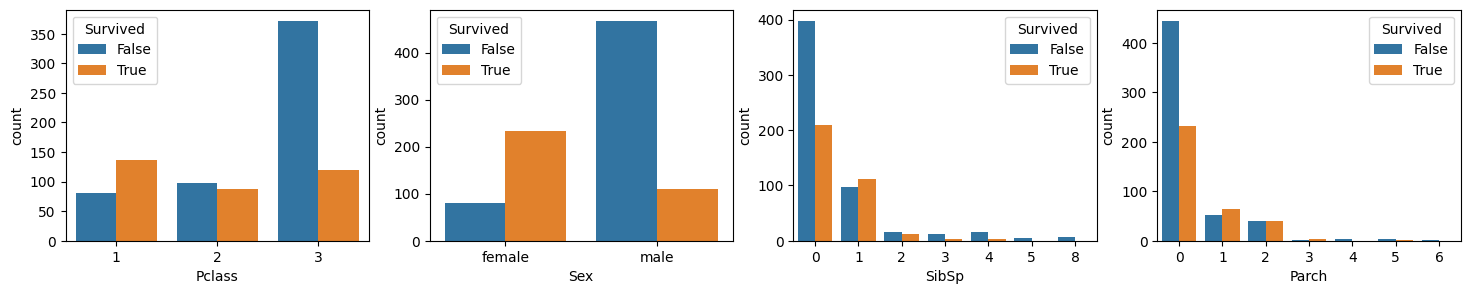

In [164]:
fig, axes = plt.subplots(1, 4, figsize=(18, 3))

sns.countplot(data, x="Pclass", hue="Survived", ax=axes[0])
sns.countplot(data, x="Sex", hue="Survived", ax=axes[1])
sns.countplot(data, x="SibSp", hue="Survived", ax=axes[2])
sns.countplot(data, x="Parch", hue="Survived", ax=axes[3])

<Axes: xlabel='Embarked', ylabel='count'>

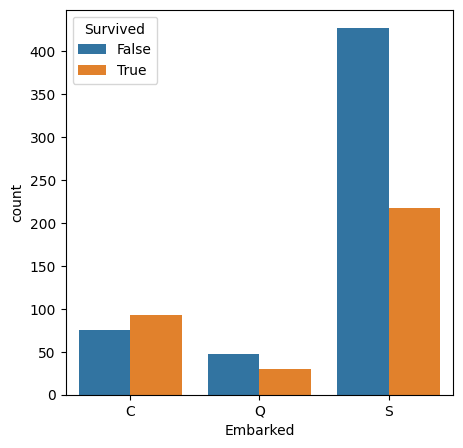

In [165]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))

sns.countplot(data, x="Embarked", hue="Survived", ax=axes)

<Axes: xlabel='Fare', ylabel='Percent'>

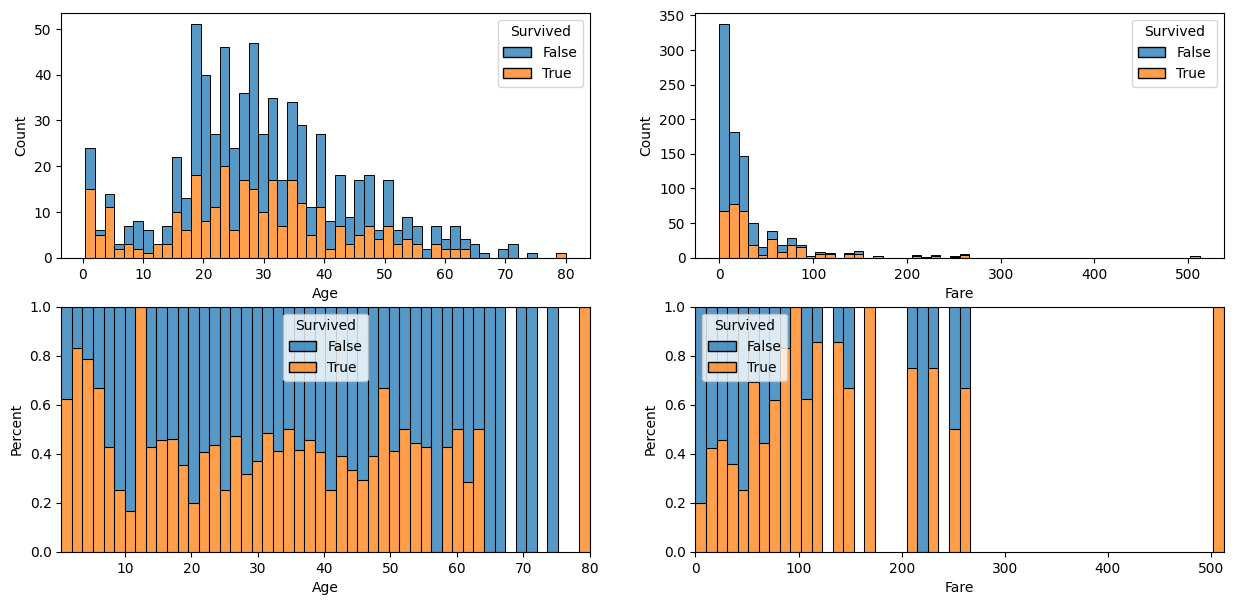

In [166]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7))

sns.histplot(data=data, x="Age", hue="Survived", bins=50, multiple='stack', ax=axes[0][0])
sns.histplot(data=data, x="Fare", hue="Survived", bins=50, multiple='stack', ax=axes[0][1])
sns.histplot(data=data, x="Age", hue="Survived", bins=50, multiple='fill', stat='percent', ax=axes[1][0])
sns.histplot(data=data, x="Fare", hue="Survived", bins=50, multiple='fill', stat='percent', ax=axes[1][1])

<Axes: xlabel='Cabin', ylabel='count'>

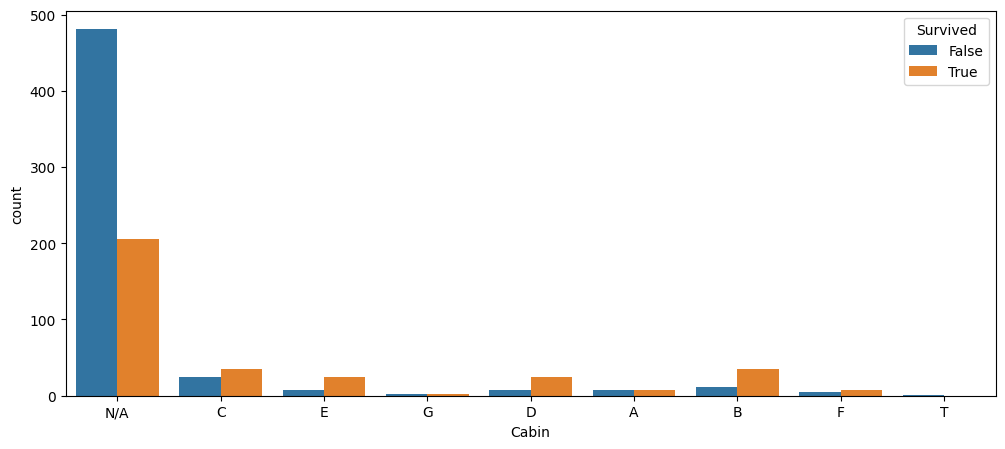

In [167]:
cabin_letter = data['Cabin'].str[0]
cabin_letter = cabin_letter.fillna('N/A') # no cabin number

fig, axes = plt.subplots(1, 1, figsize=(12, 5))

sns.countplot(data, x=cabin_letter, hue='Survived', ax=axes)

(-0.5, 42.5, 0.0, 427.35)

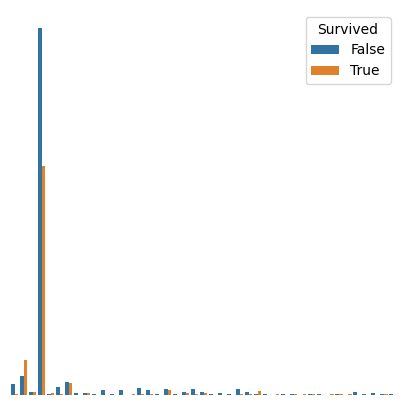

In [168]:
ticket_code = data["Ticket"].str.replace(r'\d+', '', regex=True)
ticket_code = ticket_code.fillna('NULL') # no code

fig, axes = plt.subplots(1, 1, figsize=(5, 5))

sns.countplot(data, x=ticket_code, hue='Survived', ax=axes)
plt.axis('off')

In [169]:
def fillEmbarked(data):
    location = data['Embarked'].mode()[0]
    return data.fillna(value={"Embarked": location})

data = fillEmbarked(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    category
dtypes: bool(1), category(3), float64(2), int64(3), object(3)
memory usage: 59.7+ KB


In [170]:
def processCabin(data):
    data['has_cabin'] = data['Cabin'].notnull()
    return data.drop(['Cabin'], axis=1)

data = processCabin(data)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_cabin
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False


In [171]:
def processRelatives(data):
    data['relatives'] = data['SibSp'] + data['Parch']
    return data

data = processRelatives(data)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_cabin,relatives
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,1
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,1
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,0
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,1
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,0


In [172]:
def processAge(data):
    data['is_baby'] = data['Age'] <= 1.0 # is newborn
    data['is_young'] = data['Age'] <= 8.0 # less than 8 years old
    data['is_old'] = data['Age'] >= 65.0 # older than 65 years old

    data['Age'] = data['Age'].fillna(data['Age'].mean()) # impute the age with the mean since normally distributed

    return data

data = processAge(data)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_cabin,relatives,is_baby,is_young,is_old
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,1,False,False,False
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,1,False,False,False
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,0,False,False,False
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,1,False,False,False
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,0,False,False,False


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
 11  has_cabin    891 non-null    bool    
 12  relatives    891 non-null    int64   
 13  is_baby      891 non-null    bool    
 14  is_young     891 non-null    bool    
 15  is_old       891 non-null    bool    
dtypes: bool(5), category(3), float64(2), int64(4), object(2)
memory usage: 63.2+ KB


In [174]:
def processName(data):
    data['isMarriedWoman'] = data['Name'].str.contains('Mrs.')
    return data.drop(['Name'], axis=1)

data = processName(data)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_cabin,relatives,is_baby,is_young,is_old,isMarriedWoman
0,1,False,3,male,22.0,1,0,A/5 21171,7.2500,S,False,1,False,False,False,False
1,2,True,1,female,38.0,1,0,PC 17599,71.2833,C,True,1,False,False,False,True
2,3,True,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,0,False,False,False,False
3,4,True,1,female,35.0,1,0,113803,53.1000,S,True,1,False,False,False,True
4,5,False,3,male,35.0,0,0,373450,8.0500,S,False,0,False,False,False,False


In [175]:
def dropFeatures(data):
    return data.drop(['PassengerId', 'Ticket'], axis=1)

data = dropFeatures(data)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,has_cabin,relatives,is_baby,is_young,is_old,isMarriedWoman
0,False,3,male,22.0,1,0,7.2500,S,False,1,False,False,False,False
1,True,1,female,38.0,1,0,71.2833,C,True,1,False,False,False,True
2,True,3,female,26.0,0,0,7.9250,S,False,0,False,False,False,False
3,True,1,female,35.0,1,0,53.1000,S,True,1,False,False,False,True
4,False,3,male,35.0,0,0,8.0500,S,False,0,False,False,False,False


In [176]:
def onehotencode(data):
    label_encoder = LabelEncoder()

    for feature in ['Sex','Embarked','Pclass']:
        data[feature] = label_encoder.fit_transform(data[feature])

    return pd.get_dummies(data, columns=['Embarked'], drop_first=False)

data = onehotencode(data)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,has_cabin,relatives,is_baby,is_young,is_old,isMarriedWoman,Embarked_0,Embarked_1,Embarked_2
0,False,2,1,22.0,1,0,7.2500,False,1,False,False,False,False,False,False,True
1,True,0,0,38.0,1,0,71.2833,True,1,False,False,False,True,True,False,False
2,True,2,0,26.0,0,0,7.9250,False,0,False,False,False,False,False,False,True
3,True,0,0,35.0,1,0,53.1000,True,1,False,False,False,True,False,False,True
4,False,2,1,35.0,0,0,8.0500,False,0,False,False,False,False,False,False,True


In [177]:
def scale(data):
    mimxscaler = MinMaxScaler()
    stdscaler = StandardScaler()

    data[['Pclass']] = mimxscaler.fit_transform(data[['Pclass']])
    data[['Age', 'Fare']] = stdscaler.fit_transform(data[['Age', 'Fare']])

    return data

data = scale(data)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,has_cabin,relatives,is_baby,is_young,is_old,isMarriedWoman,Embarked_0,Embarked_1,Embarked_2
0,False,1.0,1,-0.592481,1,0,-0.502445,False,1,False,False,False,False,False,False,True
1,True,0.0,0,0.638789,1,0,0.786845,True,1,False,False,False,True,True,False,False
2,True,1.0,0,-0.284663,0,0,-0.488854,False,0,False,False,False,False,False,False,True
3,True,0.0,0,0.407926,1,0,0.420730,True,1,False,False,False,True,False,False,True
4,False,1.0,1,0.407926,0,0,-0.486337,False,0,False,False,False,False,False,False,True


In [178]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # split data to train and test

In [179]:
model = LogisticRegression(solver='liblinear',penalty='l1')
scores = cross_val_score(model, X_train, y_train, cv=5) # 5 fold cross-validation
print("Mean CV accuracy:", scores.mean())

Mean CV accuracy: 0.8160642174726682


In [180]:
model.fit(X_train, y_train) # now fit the entire training set

LogisticRegression(penalty='l1', solver='liblinear')

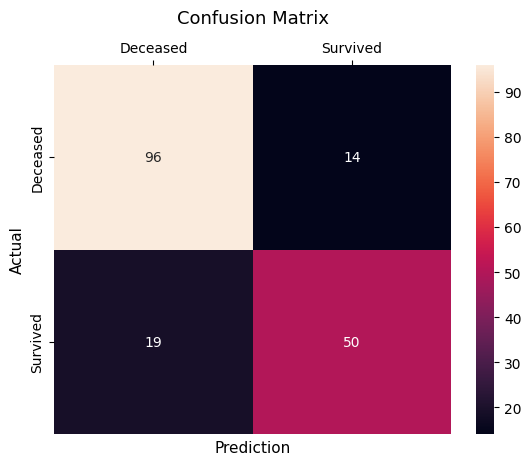

In [181]:
def show_confusion_matrix():
    y_pred = model.predict(X_test) # evaluate the test set
    cf_matrix = confusion_matrix(y_test, y_pred) # compute the confusion matrix of the test set

    sns.heatmap(cf_matrix, annot=True, xticklabels=['Deceased','Survived'],yticklabels=['Deceased','Survived']) 
    # use seaborn to show heatmap of the confusion matrix along with the numbers

    plt.ylabel('Actual', fontsize=11)
    plt.xlabel('Prediction', fontsize=11)
    plt.title('Confusion Matrix', fontsize=13, pad=30)
    # add labels and titles

    plt.gca().xaxis.tick_top() # add visual tick marks

    return y_pred

y_pred_old = show_confusion_matrix() # compute hard labels= predictions
y_prob_old = model.predict_proba(X_test)[:, 1] # compute probabilities to display auc curve later